Pré-análise dos dados referentes a Porto Seguro na instância Conquista 

Pré-Análise Geral

In [0]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import seaborn as sns; sns.set()
#sklearn
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Leitura dos dados 
i='/content/drive/My Drive/Colab Notebooks/intents_portoconquista.csv'
int_df=pd.read_csv(i,sep=';')

m='/content/drive/My Drive/Colab Notebooks/entities_portoconquista.csv'
ent_df=pd.read_csv(m,sep=';')

t='/content/drive/My Drive/Colab Notebooks/portoconquista.csv'
messall_df=pd.read_csv(t,sep=';')

#filtro para data especificação 
messall_df['date'] = pd.to_datetime(messall_df['date'])
mess_df = messall_df[(messall_df['date'] >= '22/03/2020') & (messall_df['date'] <= '04/04/2020')]

messall_df

,assistant_id,new_intent,message,intent,confidence,status,date,created_at,updated_at,approved_at
0,3,NaN,quero saber sobre investimentos?,informacoes_sobre_investimentos,0.783548,approved,2019-09-26,2019-09-26 08:02:20,2019-09-26 18:37:31,2019-09-26 18:37:31
1,3,NaN,Quero ver meu saldo,consultar_saldo_pontos_atuais,0.806480,approved,2019-09-25,2019-09-25 18:24:41,2019-09-26 18:37:46,2019-09-26 18:37:46
2,3,NaN,Preciso da segunda via da fatura do meu cartao...,fatura_cartao_em_pdf,0.508233,approved,2019-09-25,2019-09-25 18:22:01,2019-09-26 18:39:05,2019-09-26 18:39:05
3,3,irrelevant,teste,vigencia_do_seguro_de_vida,0.083470,approved,2019-10-01,2019-10-01 18:47:01,2019-10-02 09:57:21,2019-10-02 09:57:21
4,3,irrelevant,teste,vigencia_do_seguro_de_vida,0.083470,approved,2019-10-01,2019-10-01 18:45:25,2019-10-02 09:57:49,2019-10-02 09:57:49
...,...,...,...,...,...,...,...,...,...,...
9366,3,NaN,Não consigo fazer investimento informa que meu...,fundo_de_investimento,0.867449,revision,2020-02-28,2020-02-28 11:55:11,2020-03-02 15:38:00,NaN
9367,3,NaN,não consigo investir,fundo_de_investimento,0.926135,revision,2020-03-02,2020-03-02 09:17:21,2020-04-02 11:32:21,NaN
9368,3,NaN,Fazer cadastro com investimento cambial e apr...,fundo_de_investimento,0.959845,revision,2020-03-22,2020-03-22 08:04:13,2020-04-02 11:26:11,NaN
9369,3,NaN,Perdi a senha para realizar o resgaste da minh...,fundo_de_investimento,0.980329,revision,2020-02-10,2020-02-10 10:41:21,2020-03-02 15:47:05,NaN


Perfil dos datasets

In [0]:
print("Shape dos dados Intent", int_df.shape)
print("Shape  dos dados Entities",ent_df.shape)
print("Shape dos dados Message", mess_df.shape)
print("Shape dos dados Message total", messall_df.shape)

Shape dos dados Intent (178, 2)
Shape  dos dados Entities (108, 4)
Shape dos dados Message (35, 10)
Shape dos dados Message total (9371, 10)


Frequência de Intenções Avaliadas pelo Watson - Geral 

In [0]:
# Bar columns of the frequency

Freq_intents = messall_df.groupby(['intent']).size().reset_index(name = 'freq')
Freq_intents= Freq_intents.sort_values(['freq'], ascending=False)
Freq_intents = Freq_intents.reset_index()
del Freq_intents['index']     
Freq_intents

,intent,freq
0,acesso_meus_produtos,797
1,progresso_saldo_total_dos_objetivos,373
2,vigencia_do_seguro_de_vida,302
3,acrescentar_valor_ao_objetivo,288
4,vantagens_plataforma,224
...,...,...
178,conceito_credito_pessoal,2
179,taxa_administrativa_por_fundo,1
180,atraso_pagamento_credito_pessoal,1
181,objetivos,1


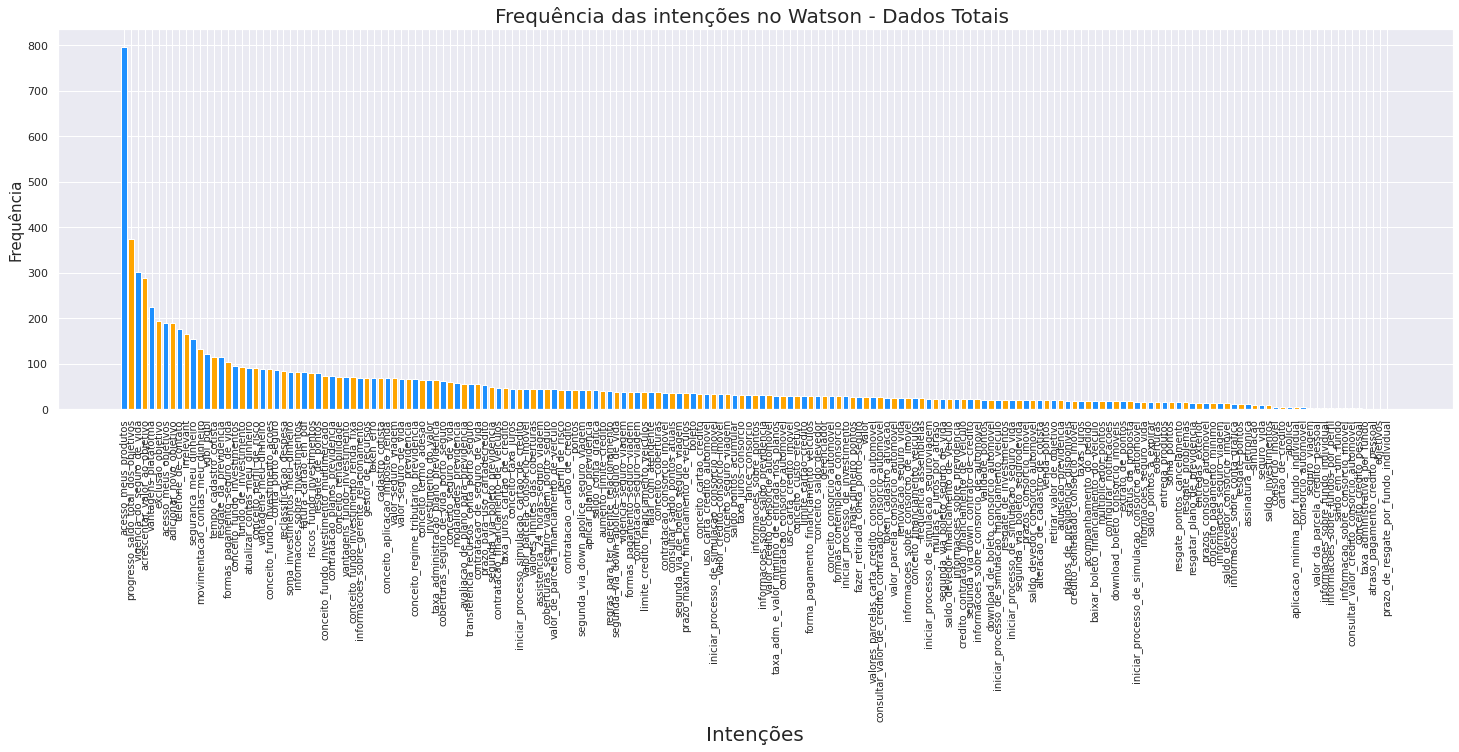

In [0]:
height = Freq_intents['freq']
bars = Freq_intents['intent']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['dodgerblue','orange'])
plt.xlabel('Intenções',fontsize=20)
plt.rcParams['figure.figsize'] = (25,7)
plt.ylabel('Frequência', fontsize=15)
plt.xticks(y_pos, bars, rotation=90, fontsize=10)
plt.title("Frequência das intenções no Watson - Dados Totais ", fontsize=20)
plt.show()

Frequência de dados avaliados pela curadoria - Dados Totais 

In [0]:
### Get the curated data
DF_portoconsorcio = messall_df[messall_df['status'] == 'approved']
### Replacing nan for intent value
DF_portoconsorcio['new_intent'].fillna(DF_portoconsorcio['intent'], inplace=True)
print("numero de msg avaliadas: ",DF_portoconsorcio.shape[0])

numero de msg avaliadas:  1373


In [0]:
#### Bar columns of the frequency
Freq_intents = DF_portoconsorcio.groupby(['intent']).size().reset_index(name = 'freq')
Freq_intents= Freq_intents.sort_values(['freq'], ascending=False)
Freq_intents = Freq_intents.reset_index()
del Freq_intents['index']     
Freq_intents

,intent,freq
0,vigencia_do_seguro_de_vida,262
1,progresso_saldo_total_dos_objetivos,124
2,fundo_de_investimento,77
3,resgate_de_pontos,56
4,vigencia_seguro_viagem,35
...,...,...
140,formas_pagamento_seguro_viagem,1
141,formas_pagamento_seguro_de_vida,1
142,status_da_proposta,1
143,prazos_consorcio_imovel,1


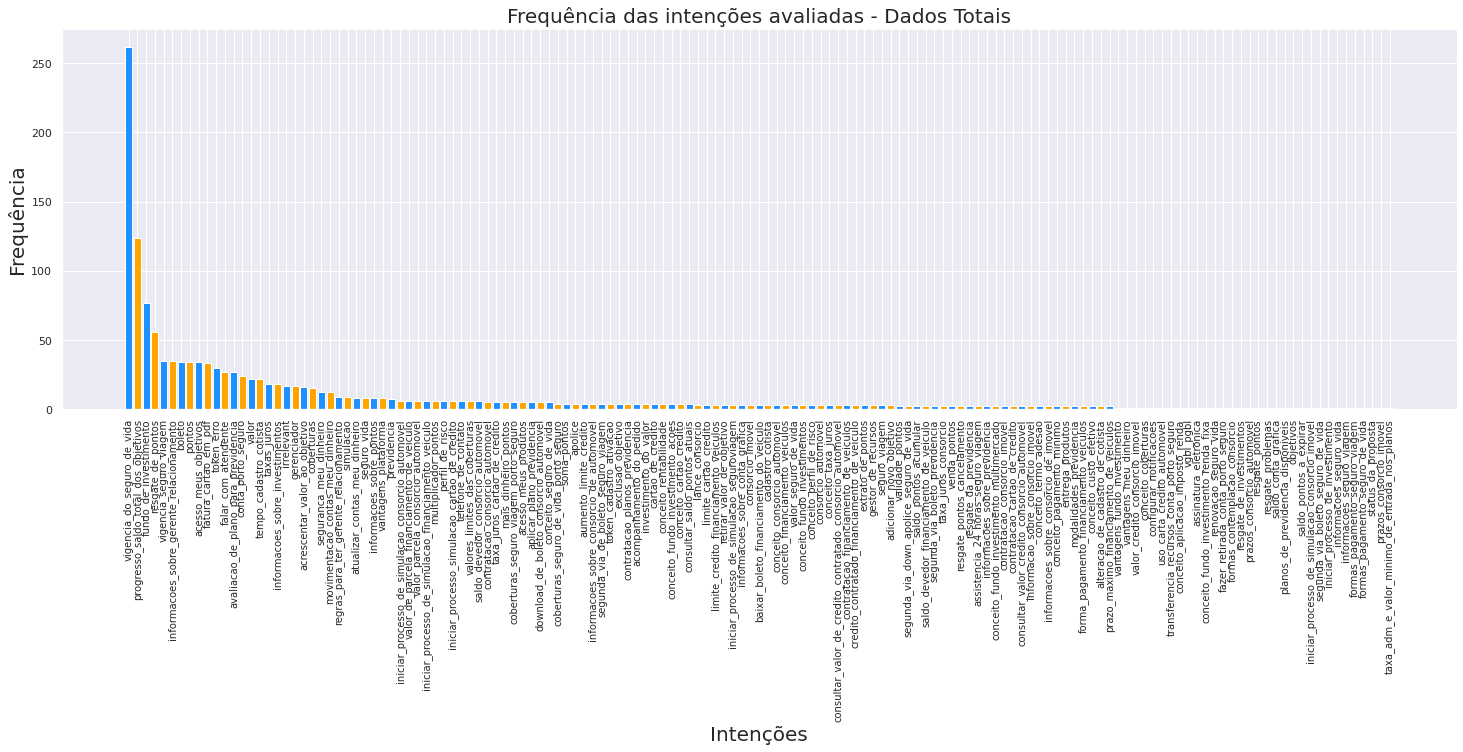

In [0]:
height = Freq_intents['freq']
bars = Freq_intents['intent']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['dodgerblue','orange'])
plt.xlabel('Intenções',fontsize=20)
plt.rcParams['figure.figsize'] = (30,10)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(y_pos, bars, rotation=90, fontsize=10)
plt.title("Frequência das intenções avaliadas - Dados Totais", fontsize=20)
plt.show()

In [0]:
#intents included in the curated data
labels = np.concatenate(((pd.unique(DF_portoconsorcio['intent'])),(pd.unique(DF_portoconsorcio['new_intent']))),axis=0)
labels=np.unique(labels)
print("Número de intenções avaliadas: ", len(labels))

Número de intenções avaliadas:  145


Matriz de confusão

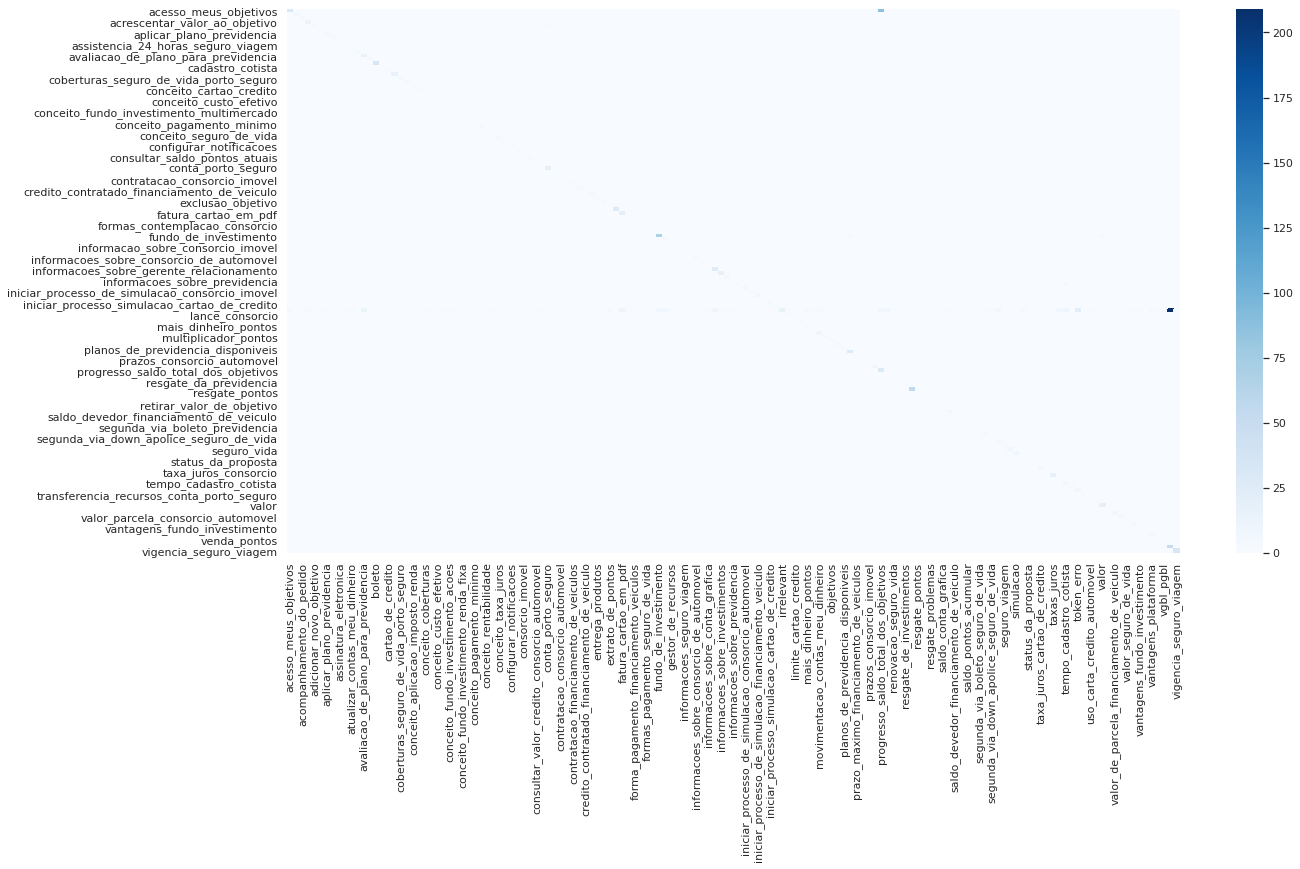

In [0]:
y_true = DF_portoconsorcio['new_intent']
y_pred = DF_portoconsorcio['intent']
cf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

import seaborn as sns
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cf_matrix, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (20,10))
sns.heatmap(df_cm, cmap="Blues")

In [0]:
DF_confux= DF_portoconsorcio[DF_portoconsorcio['intent'] != DF_portoconsorcio['new_intent']]
DF_confux.head(5)

,assistant_id,new_intent,message,intent,confidence,status,date,created_at,updated_at,approved_at
3,3,irrelevant,teste,vigencia_do_seguro_de_vida,0.08347,approved,2019-10-01,2019-10-01 18:47:01,2019-10-02 09:57:21,2019-10-02 09:57:21
4,3,irrelevant,teste,vigencia_do_seguro_de_vida,0.08347,approved,2019-10-01,2019-10-01 18:45:25,2019-10-02 09:57:49,2019-10-02 09:57:49
5,3,irrelevant,teste,vigencia_do_seguro_de_vida,0.08347,approved,2019-10-01,2019-10-01 18:43:48,2019-10-02 09:58:01,2019-10-02 09:58:01
6,3,irrelevant,teste,vigencia_do_seguro_de_vida,0.08347,approved,2019-10-01,2019-10-01 17:30:01,2019-10-02 09:58:11,2019-10-02 09:58:11
7,3,irrelevant,Teste bot,vigencia_do_seguro_de_vida,0.08347,approved,2019-10-01,2019-10-01 17:26:41,2019-10-02 09:58:30,2019-10-02 09:58:30


In [0]:
labels = np.concatenate(((pd.unique(DF_confux['intent'])),(pd.unique(DF_confux['new_intent']))),axis=0)
labels = np.unique(labels)
dictlabel = dict(enumerate(labels))

In [0]:
y_true = DF_confux['new_intent']
y_pred = DF_confux['intent']
cf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

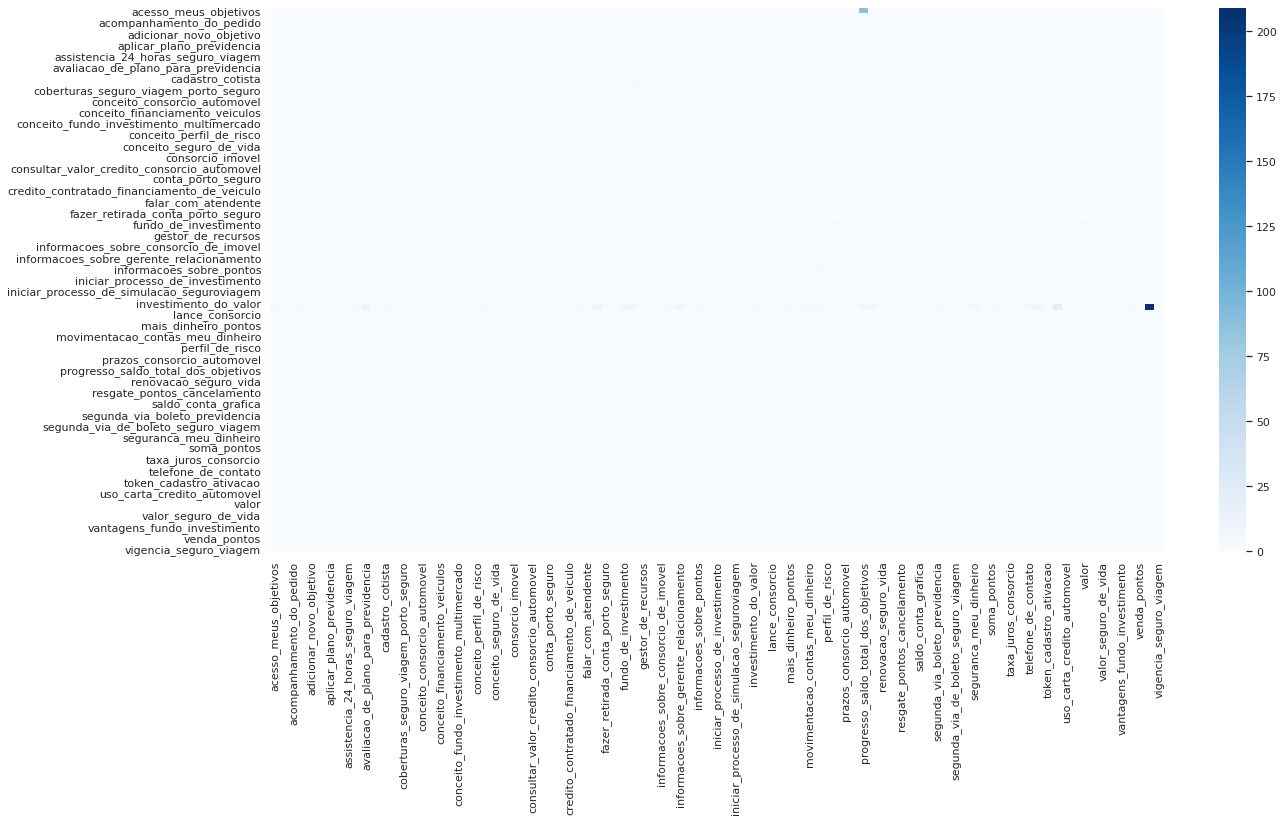

In [0]:
df_cm = pd.DataFrame(cf_matrix, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, cmap="Blues")

In [0]:
# filtrando conflitos com frequência de igual ou maior que 25
positions = np.where(cf_matrix >= 10)
print("Intents que estão se confundindo:")
for i,x in enumerate(positions[0]):
    y_true = labels[positions[0][i]]
    y_pred = labels[positions[1][i]]
    print(y_true," com ",y_pred, " --------------------------> Numero de confusões: ", cf_matrix[positions[0][i]][positions[1][i]])

Intents que estão se confundindo:
acesso_meus_objetivos  com  progresso_saldo_total_dos_objetivos  --------------------------> Numero de confusões:  88
irrelevant  com  avaliacao_de_plano_para_previdencia  --------------------------> Numero de confusões:  12
irrelevant  com  fatura_cartao_em_pdf  --------------------------> Numero de confusões:  11
irrelevant  com  informacoes_sobre_gerente_relacionamento  --------------------------> Numero de confusões:  10
irrelevant  com  tempo_cadastro_cotista  --------------------------> Numero de confusões:  10
irrelevant  com  token_erro  --------------------------> Numero de confusões:  22
irrelevant  com  vigencia_do_seguro_de_vida  --------------------------> Numero de confusões:  209


Frases de Treinamento

In [0]:
#### carregando os dataset com a frases de treino.
DF_intents =  int_df.groupby("name").text.apply(list).reset_index()
DF_intents.drop_duplicates(subset ="name", keep = 'first', inplace = True)

DF_intents['Qts'] = 0
for i,x in enumerate(DF_intents['text']):    
    DF_intents['Qts'][i] =  len(DF_intents['text'][i])
DF_intents= DF_intents.sort_values(['Qts'], ascending=False)
DF_intents

,name,text,Qts
11,fundo_de_investimento,"[fundo de investimento, fundos de investimento...",12
27,vantagens_plataforma,"[Que benefícios tenho nesta plataforma?, Quais...",10
17,reclassificacao_despesa,"[Como reclassifico uma despesa?, Pode me auxil...",9
0,acesso_meus_produtos,[Como acesso mais informações sobre meus produ...,9
8,consorcio_imovel,"[consórcio de imóvel, imóveis, falar sobre con...",8
25,token_erro,"[Não recebi o sms de validação do Token?, Não ...",8
24,token_cadastro_ativacao,"[Como libero o token?, Como faço para ativar o...",8
22,status_da_proposta,"[Preciso saber o status da minha proposta, Com...",8
4,cartao_de_credito,"[cartão de crédito, cartão, limite do cartão, ...",7
6,configurar_notificacoes,"[Quero ajustar as notificações, Mostrar como c...",7


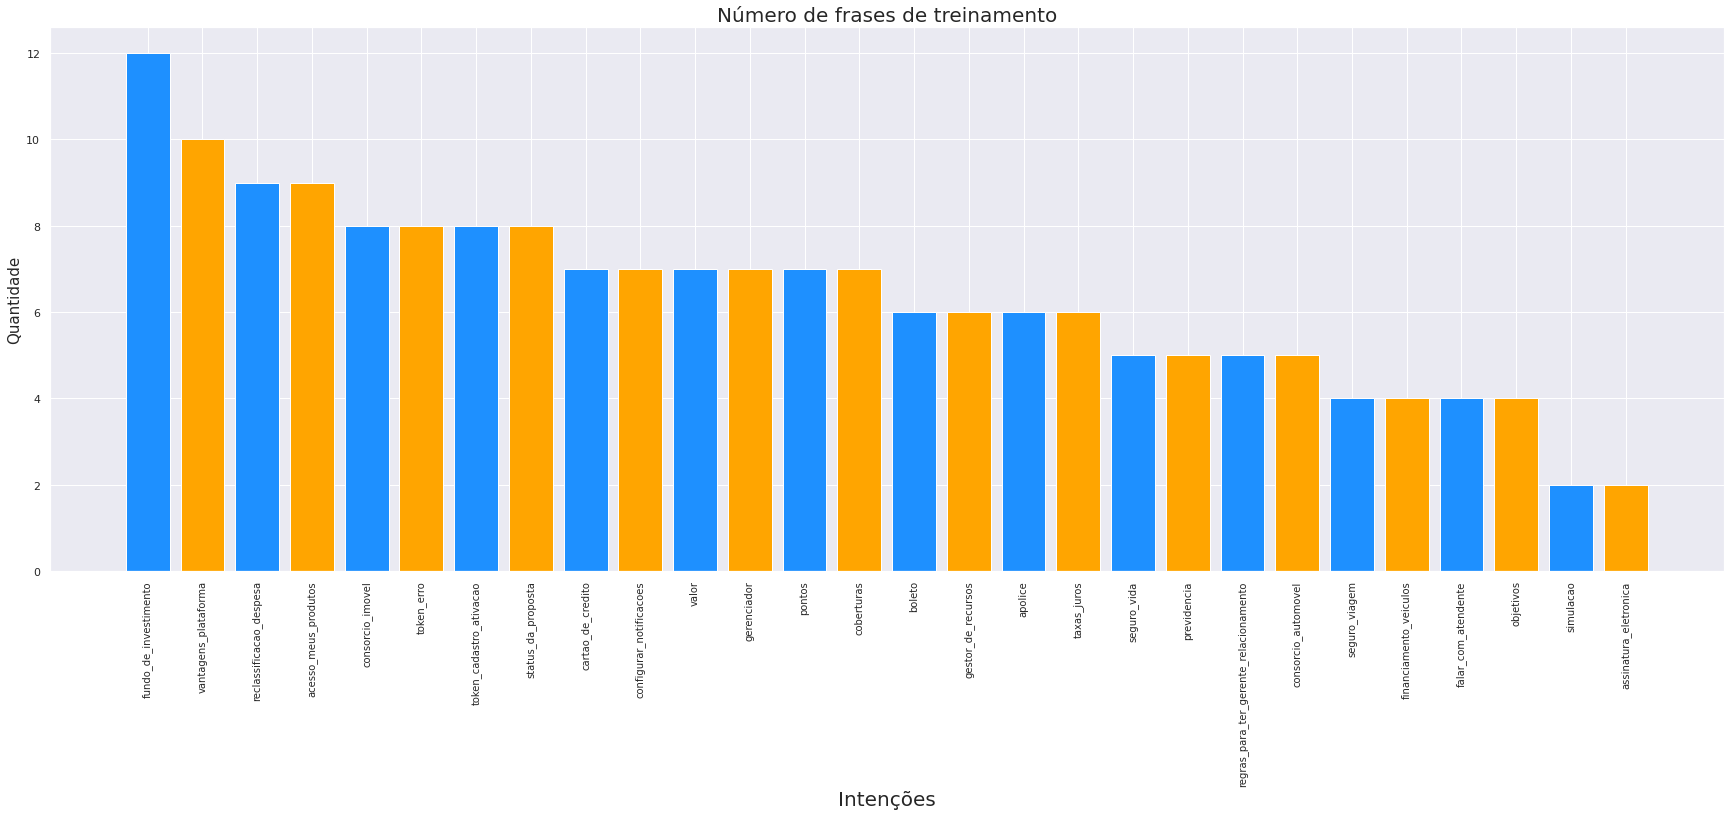

In [0]:
height = DF_intents['Qts']
bars = DF_intents['name']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['dodgerblue','orange'])
plt.xlabel('Intenções',fontsize=20)
plt.rcParams['figure.figsize'] = (25,7)
plt.ylabel('Quantidade', fontsize=15)
plt.xticks(y_pos, bars, rotation=90, fontsize=10)
plt.title("Número de frases de treinamento", fontsize=20)
plt.show()

Entidades 

In [0]:
DF_ent = ent_df.groupby("name").value.apply(list).reset_index()
DF_ent.drop_duplicates(subset ="name", keep = 'first', inplace = True)

DF_ent['Qts'] = 0
for i,x in enumerate(DF_ent['value']):    
   DF_ent['Qts'][i] =  len(DF_ent['value'][i])
DF_ent= DF_ent.sort_values(['Qts'], ascending=False)
DF_ent.head(15)

,name,value,Qts
8,investimento,"[renda_fixa, riscos, vantagens, multimercado, ...",21
10,pontos,"[saldo, extrato, resgate, cpf, validade, multi...",11
11,previdencia_privada,"[conceito, modalidades, regime_tributario, res...",9
15,simulacao,"[simular_consorcio_imovel, simular_consorcio_a...",8
14,seguro_vida,"[valor, pagamento, informacoes, renovacao, bol...",7
13,seguro_viagem,"[valor, pagamento, assistencia, informacoes, b...",6
9,objetivos,"[excluir, acessar, adicionar, progresso, editar]",5
12,segunda_via,"[Vida, Previdencia, Consorcioimoveis, Faturaca...",5
3,consorcio_auto,"[lance, carta, assembleias, parcela_valor, bol...",5
6,financiamento_veiculo,"[prazo, formas_pagto, limite, cet, parcelas_va...",5


Pré-Análise para 29/03/2020 - 04/04/2020

Frequência de Intenções Avaliadas pelo Watson



In [0]:
# Bar columns of the frequency

Freq_intents = mess_df.groupby(['intent']).size().reset_index(name = 'freq')
Freq_intents= Freq_intents.sort_values(['freq'], ascending=False)
Freq_intents = Freq_intents.reset_index()
del Freq_intents['index']     
Freq_intents

,intent,freq
0,fundo_de_investimento,11
1,falar_com_atendente,8
2,pontos,6
3,gerenciador,3
4,consorcio_imovel,2
5,acesso_meus_produtos,1
6,assinatura_eletronica,1
7,token_cadastro_ativacao,1
8,valor,1
9,vantagens_plataforma,1


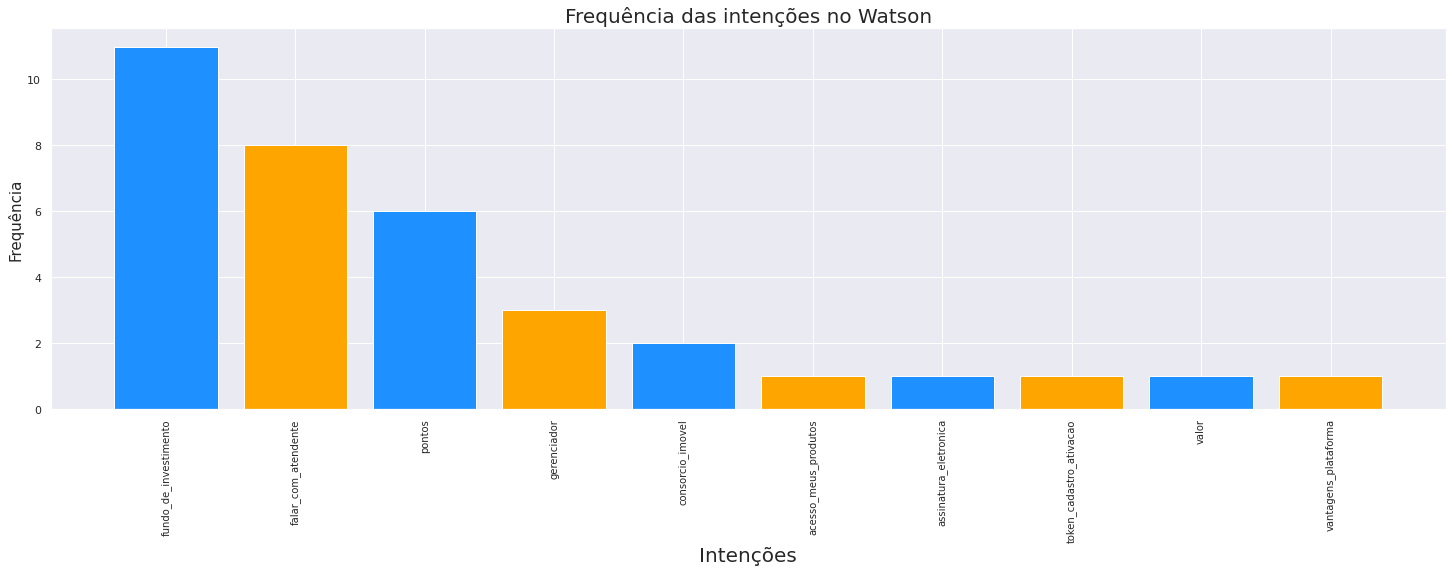

In [0]:
height = Freq_intents['freq']
bars = Freq_intents['intent']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['dodgerblue','orange'])
plt.xlabel('Intenções',fontsize=20)
plt.rcParams['figure.figsize'] = (20,10)
plt.ylabel('Frequência', fontsize=15)
plt.xticks(y_pos, bars, rotation=90, fontsize=10)
plt.title("Frequência das intenções no Watson", fontsize=20)
plt.show()

Frequência de dados avaliados pela curadoria 


In [0]:
### Get the curated data
DF_portoconsorcio_p = mess_df[mess_df['status'] == 'approved']
### Replacing nan for intent value
DF_portoconsorcio_p['new_intent'].fillna(DF_portoconsorcio_p['intent'], inplace=True)
print("numero de msg avaliadas: ",DF_portoconsorcio_p.shape[0])

numero de msg avaliadas:  13


In [0]:
#### Bar columns of the frequency
Freq_intents = DF_portoconsorcio_p.groupby(['intent']).size().reset_index(name = 'freq')
Freq_intents= Freq_intents.sort_values(['freq'], ascending=False)
Freq_intents = Freq_intents.reset_index()
del Freq_intents['index']     
Freq_intents

,intent,freq
0,falar_com_atendente,4
1,fundo_de_investimento,4
2,pontos,2
3,consorcio_imovel,1
4,gerenciador,1
5,valor,1


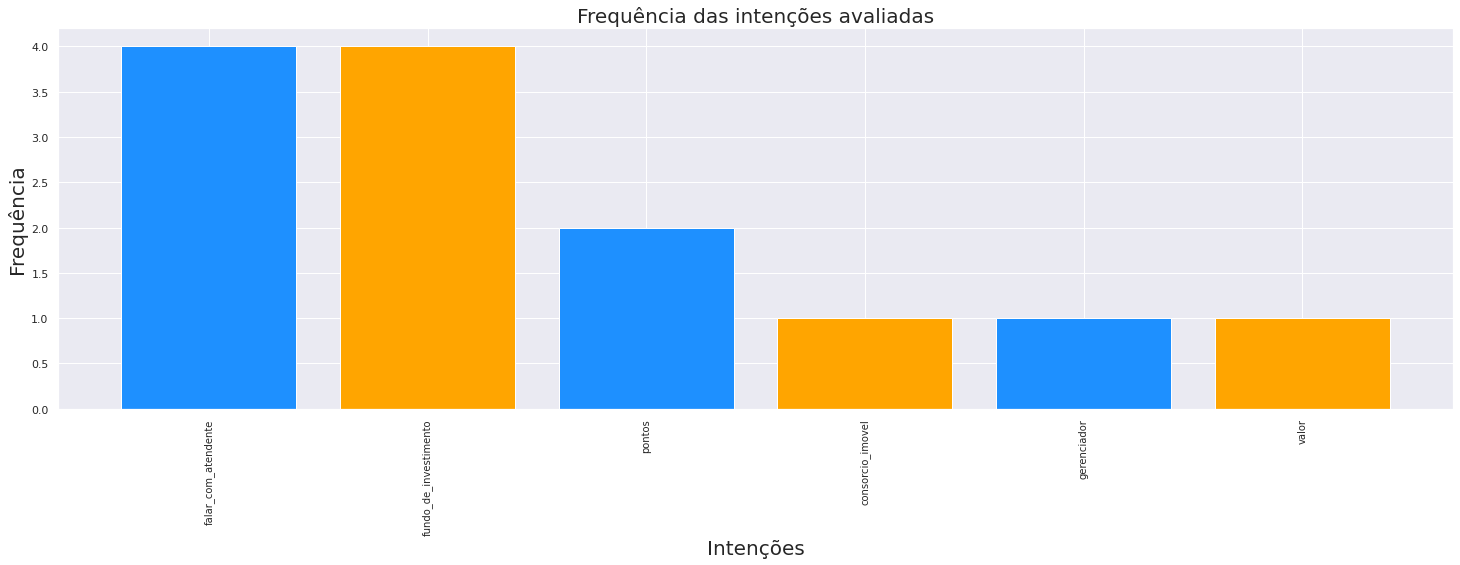

In [0]:
height = Freq_intents['freq']
bars = Freq_intents['intent']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['dodgerblue','orange'])
plt.xlabel('Intenções',fontsize=20)
plt.rcParams['figure.figsize'] = (25,7)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(y_pos, bars, rotation=90, fontsize=10)
plt.title("Frequência das intenções avaliadas", fontsize=20)
plt.show()

In [0]:
#intents included in the curated data
labels = np.concatenate(((pd.unique(DF_portoconsorcio_p['intent'])),(pd.unique(DF_portoconsorcio_p['new_intent']))),axis=0)
labels=np.unique(labels)
print("Número de intenções avaliadas: ", len(labels))

Número de intenções avaliadas:  7


Matriz de Confusão 

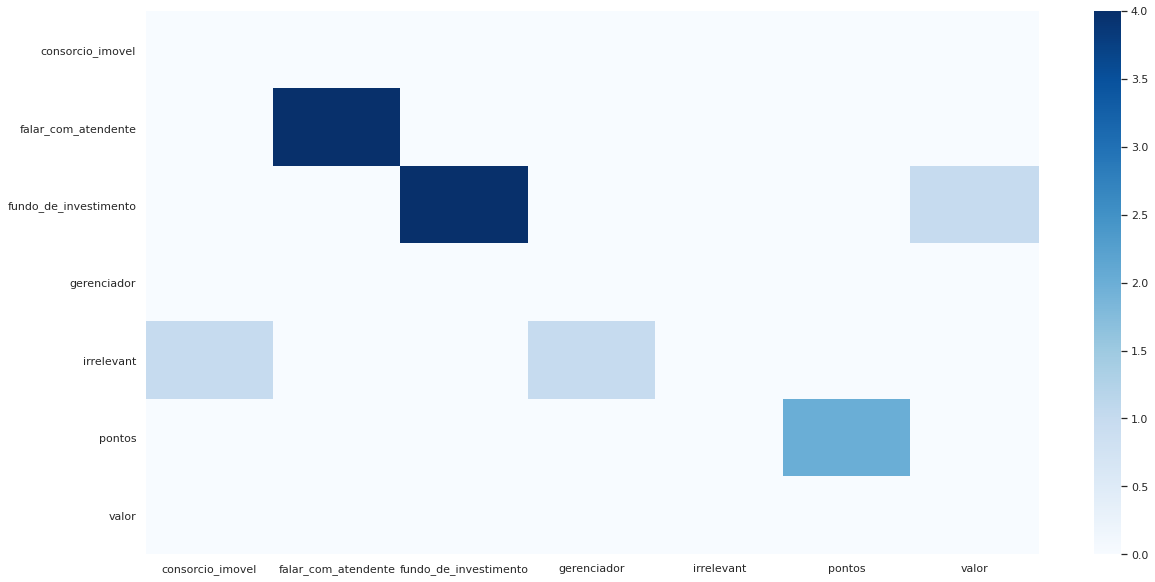

In [0]:
y_true = DF_portoconsorcio_p['new_intent']
y_pred = DF_portoconsorcio_p['intent']
cf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

import seaborn as sns
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cf_matrix, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (20,10))
sns.heatmap(df_cm, cmap="Blues")

In [0]:
DF_confux= DF_portoconsorcio_p[DF_portoconsorcio_p['intent'] != DF_portoconsorcio_p['new_intent']]
DF_confux.head(15)

,assistant_id,new_intent,message,intent,confidence,status,date,created_at,updated_at,approved_at
1304,3,fundo_de_investimento,"quero resgatar o valor total do fundo ,",valor,0.708689,approved,2020-03-30,2020-03-30 08:50:12,2020-04-01 09:02:21,2020-04-01 09:02:21
1305,3,irrelevant,Oi Mozart,consorcio_imovel,0.072303,approved,2020-03-27,2020-03-27 13:27:29,2020-04-01 09:03:17,2020-04-01 09:03:17
1309,3,irrelevant,Olá,gerenciador,0.074179,approved,2020-03-25,2020-03-25 08:56:35,2020-04-01 09:03:52,2020-04-01 09:03:52


In [0]:
labels = np.concatenate(((pd.unique(DF_confux['intent'])),(pd.unique(DF_confux['new_intent']))),axis=0)
labels = np.unique(labels)
dictlabel = dict(enumerate(labels))

In [0]:
y_true = DF_confux['new_intent']
y_pred = DF_confux['intent']
cf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

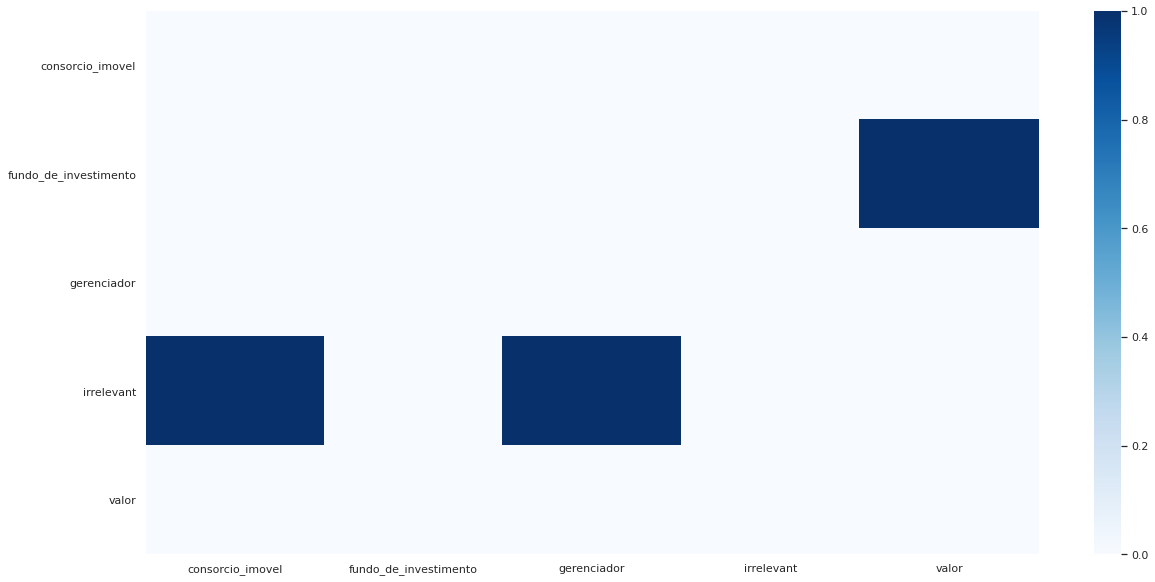

In [0]:
df_cm = pd.DataFrame(cf_matrix, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, cmap="Blues")

In [0]:
# filtrando conflitos com frequência de igual ou maior que 5
positions = np.where(cf_matrix >= 1)
print("Intents que estão se confundindo:")
for i,x in enumerate(positions[0]):
    y_true = labels[positions[0][i]]
    y_pred = labels[positions[1][i]]
    print(y_true," com ",y_pred, " --------------------------> Numero de confusões: ", cf_matrix[positions[0][i]][positions[1][i]])

Intents que estão se confundindo:
fundo_de_investimento  com  valor  --------------------------> Numero de confusões:  1
irrelevant  com  consorcio_imovel  --------------------------> Numero de confusões:  1
irrelevant  com  gerenciador  --------------------------> Numero de confusões:  1


In [0]:
avaliado_irrelevant = pd.DataFrame(DF_portoconsorcio_p[(DF_portoconsorcio_p['new_intent'] == 'irrelevant') & (DF_portoconsorcio_p['intent'] != 'irrelevant')])
avaliado_irrelevant

,assistant_id,new_intent,message,intent,confidence,status,date,created_at,updated_at,approved_at
1305,3,irrelevant,Oi Mozart,consorcio_imovel,0.072303,approved,2020-03-27,2020-03-27 13:27:29,2020-04-01 09:03:17,2020-04-01 09:03:17
1309,3,irrelevant,Olá,gerenciador,0.074179,approved,2020-03-25,2020-03-25 08:56:35,2020-04-01 09:03:52,2020-04-01 09:03:52


In [0]:
#### carregando os dataset com a frases de treino.
DF_intents =  int_df.groupby("name").text.apply(list).reset_index()
DF_intents.drop_duplicates(subset ="name", keep = 'first', inplace = True)

DF_intents['Qts'] = 0
for i,x in enumerate(DF_intents['text']):    
    DF_intents['Qts'][i] =  len(DF_intents['text'][i])
DF_intents= DF_intents.sort_values(['Qts'], ascending=False)
DF_intents.head(15)

,name,text,Qts
11,fundo_de_investimento,"[fundo de investimento, fundos de investimento...",12
27,vantagens_plataforma,"[Que benefícios tenho nesta plataforma?, Quais...",10
17,reclassificacao_despesa,"[Como reclassifico uma despesa?, Pode me auxil...",9
0,acesso_meus_produtos,[Como acesso mais informações sobre meus produ...,9
8,consorcio_imovel,"[consórcio de imóvel, imóveis, falar sobre con...",8
25,token_erro,"[Não recebi o sms de validação do Token?, Não ...",8
24,token_cadastro_ativacao,"[Como libero o token?, Como faço para ativar o...",8
22,status_da_proposta,"[Preciso saber o status da minha proposta, Com...",8
4,cartao_de_credito,"[cartão de crédito, cartão, limite do cartão, ...",7
6,configurar_notificacoes,"[Quero ajustar as notificações, Mostrar como c...",7


In [0]:
#Frases usadas para treinamento da intent 'redes_credenciadas'
int_df[int_df['name'] == 'consorcio_imovel']

,name,text
49,consorcio_imovel,consórcio de imóvel
50,consorcio_imovel,imóveis
51,consorcio_imovel,falar sobre consórcio de imóvel
52,consorcio_imovel,dúvida sobre consórcio de imóvel
53,consorcio_imovel,consórcio de casa
54,consorcio_imovel,casa
55,consorcio_imovel,apartamento
56,consorcio_imovel,moradia


In [0]:
#Frases usadas para treinamento da intent 'redes_credenciadas'
int_df[int_df['name'] == 'gerenciador']

,name,text
77,gerenciador,meu dinheiro
78,gerenciador,menu
79,gerenciador,cadastro no portal
80,gerenciador,progresso dos objetivos
81,gerenciador,classificador de gastos
82,gerenciador,esse ambiente é seguro?
83,gerenciador,o gerenciador é seguro?


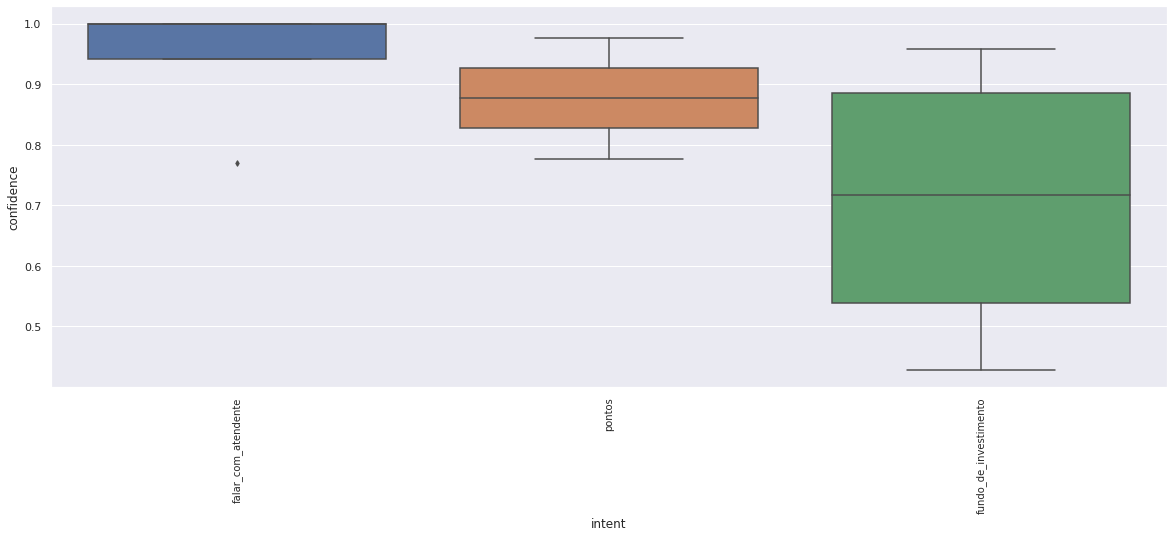

In [0]:
#Criando dataset de frases com inteções corretas
fig= plt.subplots(sharey=True, figsize=(20, 7))
DF_correct=DF_portoconsorcio_p[DF_portoconsorcio_p['intent'] == DF_portoconsorcio_p['new_intent']]
plt.xticks(rotation=90, fontsize=10)
ax = sns.boxplot(x= 'intent', y= 'confidence',data=DF_correct,fliersize=4)


In [0]:
describe_intents = DF_correct.groupby("intent").confidence.describe()
describe_intents

,count,mean,std,min,25%,50%,75%,max
intent,,,,,,,,
falar_com_atendente,4.0,0.942224,0.115553,0.768895,0.942224,1.000000,1.000000,1.000000
fundo_de_investimento,4.0,0.705611,0.246320,0.428599,0.537984,0.717638,0.885265,0.958568
pontos,2.0,0.876659,0.141160,0.776844,0.826751,0.876659,0.926566,0.976474


**Conlusão - Princpais insights**

Análise Geral 

- As mensagens avaliadas representa 14,6% do total de mensagens;
- O número de 'intents' apresenta uma oscilação bastante significativa, isso devido, justamente ao fato de haver um elevado número de 'intents';
- 'Intents' com termos muito específicos costumam ter uma baixa frequência;
- 'Irrelevant' é a intent com maior número de conflitos, sendo, em sua maior contagem ('irrelevat' confundido com 'seguro_de_vida') reponsável por 15 % do total de mensagens avaliadas;
- Frases de treinamento com sentido semelhantes a outras intents podem causar confusões na determinação da 'intent' pelo Watson; 
- Também deve-se estar atento ao número de frases de treinamento, visto que, um excedente, assim como, a ausência podem impactar no desempenho;
- Disposição das entidades na instância Conquista obedece um padrão bastante claro e objetivo.



